Preprocessing using python

In [ ]:
import pandas as pd
import numpy as np

Read TNBC_GE file

In [ ]:
df = pd.read_csv('TNBC_GE.csv')
df.set_index('Pat_id',inplace=True)
df.drop(df.columns[0],axis=1,inplace=True)
df.head(114)

In [ ]:
df.shape

remove row which has all column value NA

In [ ]:
df_drop_na = df.dropna(how='all')
df_drop_na.shape

In [ ]:
df_sta = pd.read_excel('TNBC_OS.xlsx')
df_sta.head()

In [ ]:
merge = pd.merge(df_drop_na,df_sta,on='Pat_id')
merge.head(10)

save CSV file for next process in R

In [ ]:
merge.to_csv('TNBC_GE_pre_processed_trimmed.csv')

**R** <br> 
install package and call library.

In [102]:
install.packages('ggplot2')

also installing the dependencies ‘isoband’, ‘rlang’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [112]:
library(edgeR)
library(limma)
library("readxl")
library(RColorBrewer)
library(gplots)
library(ggplot2)

Read CSV file

In [2]:
counts <- read.csv("TNBC_GE_pre_processed.csv",
                   row.names = 1,header=1)
head(counts)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,X..280660,X..317712,...,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932,Status_OS
A03U,0,12.88,26.12,307.15,2162,0,254,1,0,0,...,1278,2906,6,2923,14315,3739,3764,1259,0,1
A04D,0,43.56,36.44,1269.34,5839,0,827,0,0,0,...,1040,5266,1146,7300,4937,1812,4678,4354,2,0
A04J,0,52.47,64.53,741.04,5637,0,267,1,0,0,...,1709,2727,123,4036,10981,3569,3374,2039,54,0
A04U,0,0.00,1.00,791.85,8446,0,152,0,0,0,...,335,1685,251,1134,6203,1189,2433,165,0,0
A07C,0,89.15,32.85,769.98,7086,0,239,1,0,0,...,2812,3694,497,3401,4591,4438,4420,2362,1,0
A07O,0,14.01,18.99,297.91,4010,0,200,2,1,0,...,1196,3032,1127,3700,7488,2279,7173,66,0,0


In [30]:
dim(counts)


[1]   114 20532

Create meta data using Status_OS

In [31]:
metadata <- counts[,"Status_OS", drop=FALSE]
head(metadata)

,Status_OS
A03U,1
A04D,0
A04J,0
A04U,0
A07C,0
A07O,0


In [11]:
dim(metadata)

[1] 114   1

create count matrix

In [8]:
counts_1 <-subset(counts, select = -c(Status_OS) )
head(counts_1)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,X..280660,X..317712,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
A03U,0,12.88,26.12,307.15,2162,0,254,1,0,0,...,189,1278,2906,6,2923,14315,3739,3764,1259,0
A04D,0,43.56,36.44,1269.34,5839,0,827,0,0,0,...,90,1040,5266,1146,7300,4937,1812,4678,4354,2
A04J,0,52.47,64.53,741.04,5637,0,267,1,0,0,...,198,1709,2727,123,4036,10981,3569,3374,2039,54
A04U,0,0.00,1.00,791.85,8446,0,152,0,0,0,...,34,335,1685,251,1134,6203,1189,2433,165,0
A07C,0,89.15,32.85,769.98,7086,0,239,1,0,0,...,253,2812,3694,497,3401,4591,4438,4420,2362,1
A07O,0,14.01,18.99,297.91,4010,0,200,2,1,0,...,90,1196,3032,1127,3700,7488,2279,7173,66,0


In [9]:
dim(counts_1)

[1]   114 20531

Transpose Count matrix for further use

In [10]:
counts_1 <- t(counts_1)
dim(counts_1)

[1] 20531   114

 Storing read counts and associated information from digital gene expression using DEGList function.

In [73]:
DEG <- DGEList(counts=counts_1,group=metadata$Status_OS)
head(x)

An object of class "DGEList"
$counts
                A03U    A04D    A04J    A04U    A07C    A07O    A08R    A09X
X..100133144   12.88   43.56   52.47    0.00   89.15   14.01   78.34   12.41
X..100134869   26.12   36.44   64.53    1.00   32.85   18.99   42.66    6.59
X..10357      307.15 1269.34  741.04  791.85  769.98  297.91  491.30  221.72
X..10431     2162.00 5839.00 5637.00 8446.00 7086.00 4010.00 4016.00 2333.00
X..155060     254.00  827.00  267.00  152.00  239.00  200.00  595.00  406.00
X..340602       0.00    3.00    1.00    0.00    0.00    1.00   79.00    0.00
                A0AL    A0AR    A0AT    A0B3    A0B9    A0BG    A0BL    A0CM
X..100133144   11.47   33.99   57.33   19.35   95.88   45.04   36.39   42.71
X..100134869    9.53   23.01   27.67   18.65  158.12   38.96   32.61    8.29
X..10357      750.40  679.38  964.56  384.52 1598.37  390.62  386.83  516.51
X..10431     3719.00 5013.00 6144.00 2600.00 7500.00 4152.00 4435.00 3102.00
X..155060      86.00 1401.00  233.00  286.00 1053.00  565.00  706.00  273.00
X..340602      31.00  999.00    0.00    0.00    0.00  538.00    9.00    0.00
                A0D0    A0D2    A0DA    A0E0    A0G0    A0J4    A0J6    A0JL
X..100133144    6.23   26.59   72.02    7.96   68.04   40.25   20.77    6.91
X..100134869    3.77   25.41   86.98   18.04   35.96   50.75    9.23   16.09
X..10357      570.54  480.63  310.30  152.35  422.23  670.60  387.00  102.55
X..10431     3267.00 4941.00 1509.00 2836.00 2896.00 3496.00 5744.00 2769.00
X..155060     287.00  446.00  626.00  393.00  335.00  480.00  435.00 1706.00
X..340602       0.00    3.00    5.00    0.00    0.00    2.00    0.00    3.00
                A0RX    A0SK    A0SP    A0SX    A0T0    A0T2    A0TS    A0TU
X..100133144    6.90  160.44   32.15   38.47   26.39   45.62   67.19   49.24
X..100134869    9.10   91.56   25.85   17.53   13.61   13.38   52.81   12.76
X..10357      419.07 3551.20  522.43  472.06  595.96  287.68  321.71  301.23
X..10431     4957.00 3464.00 1832.00 2618.00 5046.00 6870.00 1054.00 8405.00
X..155060     169.00  529.00  384.00  486.00  328.00  223.00  343.00  412.00
X..340602       0.00    6.00    0.00    3.00  287.00    0.00    1.00    3.00
                A0U4    A0WA    A0XU    A0YE    A124    A128    A129    A12F
X..100133144   42.17   39.17   91.05   75.41   46.56   64.69   35.38   31.15
X..100134869   67.83   33.83   64.95   65.59   45.44   29.31   13.62   41.85
X..10357      247.23  225.72  533.34  478.85  398.47  318.69  332.21  432.53
X..10431     3135.00 2122.00 2313.00 2278.00 5925.00 3990.00 4737.00 6496.00
X..155060     142.00  226.00  244.00  662.00  308.00  891.00  436.00  842.00
X..340602       0.00    0.00    0.00    4.00  222.00    4.00    4.00    0.00
                A12V    A131    A13Z    A143    A147    A14N    A14R    A14X
X..100133144    4.47   15.36   30.96   12.07   53.59   40.31   15.42   48.15
X..100134869   14.53   27.64   19.04    2.93   24.41    9.69   39.58   57.85
X..10357      264.00  469.34  373.51  328.08  197.20  364.41  455.55  571.52
X..10431     1836.00 2831.00 5300.00 3456.00 5093.00 3301.00 4173.00 3997.00
X..155060     219.00  385.00  436.00  134.00  406.00  234.00  424.00  959.00
X..340602       0.00    0.00    1.00    1.00    9.00    0.00    0.00    0.00
                A150    A158    A18G    A18V    A1AR    A1AY    A1EW    A1F6
X..100133144    6.00  157.55   27.70   60.59   23.17   35.42   26.02   53.48
X..100134869    0.00  117.45    1.30   44.41    8.83   29.58    3.98   22.52
X..10357      216.66  197.30  205.85  593.77  277.00  320.25  301.40  218.66
X..10431     2605.00 3092.00 2959.00 3673.00 5947.00 1628.00 2639.00 2002.00
X..155060     272.00 1357.00  124.00  183.00  392.00  556.00  297.00  281.00
X..340602       1.00    6.00    0.00    1.00    1.00    1.00    1.00    0.00
                A1FC    A1G6    A1HJ    A1JF    A1JL    A1KR    A1L7    A1LH
X..100133144   74.53   23.48   64.87    8.75   64.43    0.00   19.26    5.26
X..100134869   11.47   15.52  111.13

**sample summary**

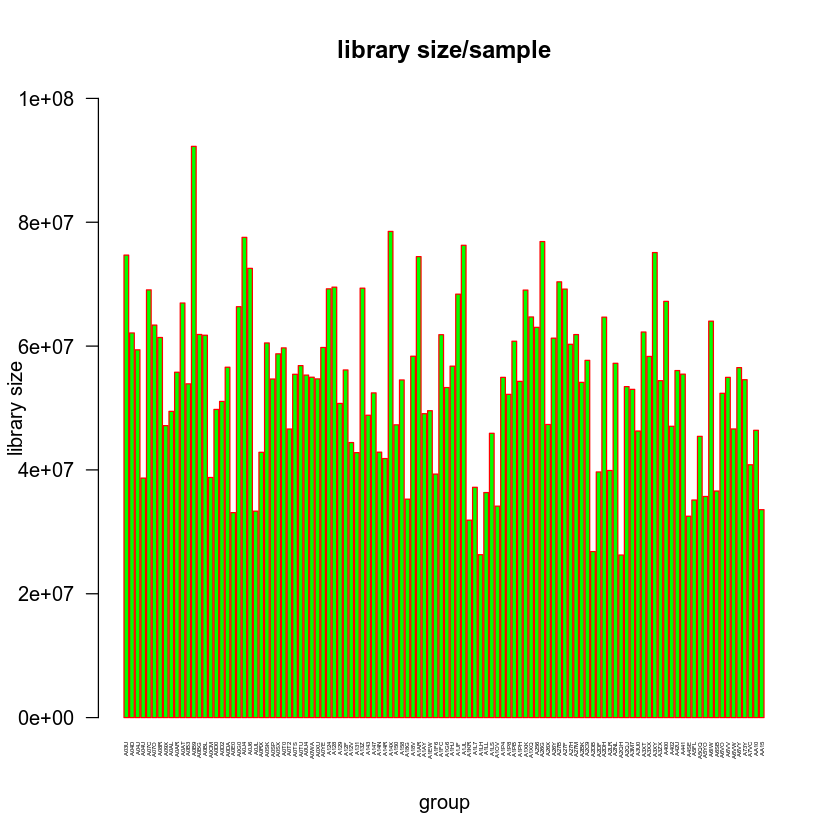

In [143]:
bar_lib <- DEG$samples$lib.size
par(mfrow=c(1,1))
barplot(bar_lib,names.arg=rownames(DEG$samples), xlab="group", ylab='library size',col="green",
main="library size/sample",border="red",las=2,cex.names = 0.3,ylim=c(0,100000000))

Remove duplicates

In [13]:
genes <- x[!duplicated(1),]
genes

,A03U,A04D,A04J,A04U,A07C,A07O,A08R,A09X,A0AL,A0AR,...,A6IW,A6SB,A6VO,A6VV,A6VW,A6VY,A73Y,A7VC,AA10,AA15
X..100130426,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
X..100133144,12.88,43.56,52.47,0.00,89.15,14.01,78.34,12.41,11.47,33.99,...,4.08,5.53,97.91,25.08,10.78,7.45,35.09,5.17,26.01,9.85
X..100134869,26.12,36.44,64.53,1.00,32.85,18.99,42.66,6.59,9.53,23.01,...,21.92,7.47,90.09,33.92,26.22,15.55,22.91,33.83,24.99,6.15
X..10357,307.15,1269.34,741.04,791.85,769.98,297.91,491.30,221.72,750.40,679.38,...,204.20,338.10,412.13,297.04,209.06,278.85,215.73,281.55,294.58,198.65
X..10431,2162.00,5839.00,5637.00,8446.00,7086.00,4010.00,4016.00,2333.00,3719.00,5013.00,...,3735.00,2515.00,3949.00,4933.00,4013.00,3728.00,1223.00,1607.00,2583.00,1475.00
X..136542,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
X..155060,254.00,827.00,267.00,152.00,239.00,200.00,595.00,406.00,86.00,1401.00,...,705.00,237.00,796.00,368.00,422.00,1227.00,782.00,1012.00,417.00,504.00
X..26823,1.00,0.00,1.00,0.00,1.00,2.00,0.00,10.00,3.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
X..280660,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,13.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
X..317712,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
dim(genes)# no duplicate genes

[1] 20531   114

**Data preprocessing**

For differential expression and related analyses, gene expression is rarely considered at the level of raw counts since libraries sequenced at a greater depth will result in higher counts. Rather, it is common practice to transform raw counts onto a scale that accounts for such library size differences. Popular transformations include counts per million (CPM), log 2-counts per million (log-CPM), reads per kilobase of transcript per million (RPKM), and fragments per kilobase of transcript per million (FPKM).

CPM and log-cpm do not use gene length while RPKM and FPKM do.

In [146]:
cpm <- cpm(DEG)
lcpm <- cpm(DEG,log=TRUE)

In [148]:
L <- mean(DEG$samples$lib.size)*1e-6
M<- median(DEG$samples$lib.size)*1e-6
c(L,M)

[1] 54.00483 54.82601

In [149]:
summary(lcpm)

      A03U             A04D             A04J              A04U       
 Min.   :-4.755   Min.   :-4.755   Min.   :-4.7550   Min.   :-4.755  
 1st Qu.:-2.339   1st Qu.:-2.450   1st Qu.:-0.9289   1st Qu.:-2.198  
 Median : 3.080   Median : 3.115   Median : 3.6099   Median : 2.928  
 Mean   : 1.825   Mean   : 1.909   Mean   : 2.3569   Mean   : 1.840  
 3rd Qu.: 5.178   3rd Qu.: 5.508   3rd Qu.: 5.5275   3rd Qu.: 5.285  
 Max.   :15.274   Max.   :12.500   Max.   :13.2722   Max.   :13.055  
      A07C             A07O             A08R             A09X       
 Min.   :-4.755   Min.   :-4.755   Min.   :-4.755   Min.   :-4.755  
 1st Qu.:-2.246   1st Qu.:-2.360   1st Qu.:-1.829   1st Qu.:-2.134  
 Median : 3.188   Median : 2.998   Median : 3.335   Median : 3.161  
 Mean   : 1.965   Mean   : 1.875   Mean   : 2.107   Mean   : 1.933  
 3rd Qu.: 5.484   3rd Qu.: 5.408   3rd Qu.: 5.481   3rd Qu.: 5.373  
 Max.   :13.024   Max.   :12.757   Max.   :12.493   Max.   :12.707  
      A0AL             A0AR

In [150]:
summary(cpm)

      A03U               A04D               A04J               A04U         
 Min.   :    0.00   Min.   :   0.000   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:    0.16   1st Qu.:   0.146   1st Qu.:   0.488   1st Qu.:   0.181  
 Median :    8.42   Median :   8.628   Median :  12.172   Median :   7.575  
 Mean   :   48.71   Mean   :  48.707   Mean   :  48.707   Mean   :  48.707  
 3rd Qu.:   36.17   3rd Qu.:  45.474   3rd Qu.:  46.087   3rd Qu.:  38.949  
 Max.   :39611.05   Max.   :5791.611   Max.   :9893.278   Max.   :8507.957  
      A07C               A07O               A08R               A09X         
 Min.   :   0.000   Min.   :   0.000   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   0.174   1st Qu.:   0.158   1st Qu.:   0.244   1st Qu.:   0.191  
 Median :   9.077   Median :   7.951   Median :  10.051   Median :   8.907  
 Mean   :  48.707   Mean   :  48.707   Mean   :  48.707   Mean   :  48.707  
 3rd Qu.:  44.710   3rd Qu.:  42.425   3rd Qu.:  44.611   3rd Qu.:  41.406  

**Removing gene that are lowly expressed** <br>
Datasets will include a mix of genes that are expressed and those that are not expressed. Whilst it is of interest to examine genes that are expressed in one condition but not in another, some genes are unexpressed throughout all samples.

In [15]:
table(rowSums(x$counts==0)==114)



FALSE  TRUE 
20063   468 

Genes that do not have a worthwhile number of reads in any sample should be filtered out of the downstream analyses. There are several reasons for this. From a biological point of view, genes that not expressed at a biologically meaningful level in any condition are not of interest and are therefore best ignored. From a statistical point of view, removing low count genes allows the mean-variance relationship in the data to be estimated with greater reliability and also reduces the number of statistical tests that need to be carried out in downstream analyses looking at differential expression.

In [16]:
keep.exprs <- filterByExpr(x,group=metadata$Status_OS)

The function keeps genes with about 10 read counts or more in a minimum number of samples, where the number of samples is chosen according to the minimum group sample size. The actual filtering uses CPM values rather than counts in order to avoid giving preference to samples with large library sizes. For this dataset, the median library size is about 51 million and 10/54.82 ≈ ~0.2, so the filterByExpr function keeps genes that have a CPM of 0.2 or more in at least three samples

If the library sizes had been larger then a lower CPM cutoff would have been chosen, because larger library sizes provide better resolution to explore more genes at lower expression levels. Alternatively, smaller library sizes decrease our ability to explore marginal genes and hence would have led to a higher CPM cutoff.

In [17]:
x<-x[keep.exprs,keep.lib.sizes=FALSE]
dim(x)

[1] 17126   114

Warning message in brewer.pal(nsamples, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”

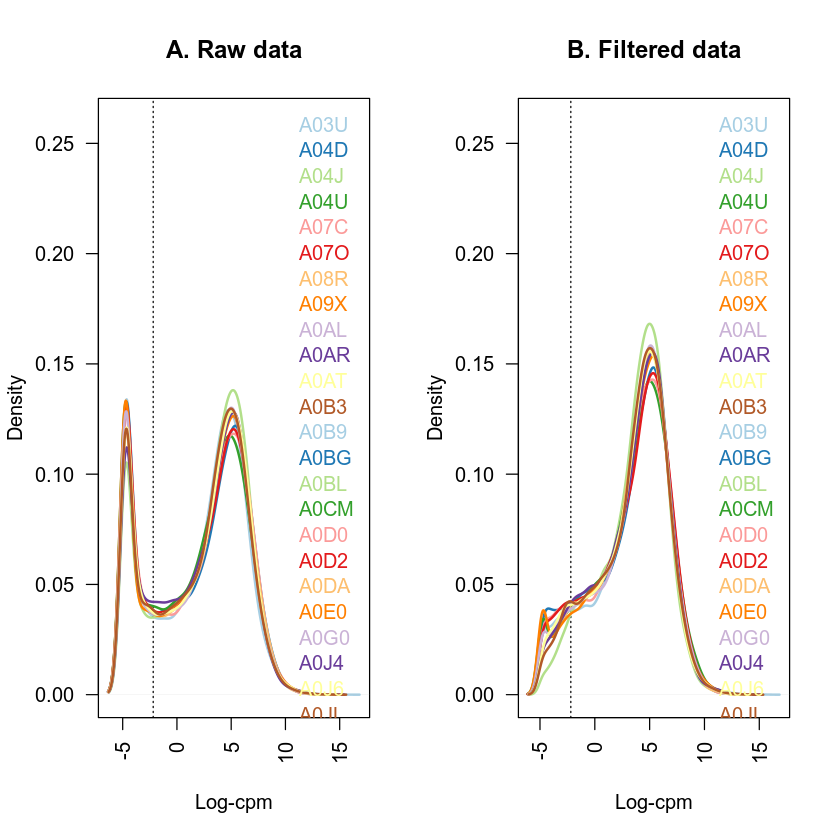

In [158]:
lcpm.cutoff <- log2(10/M + 2/L)
library(RColorBrewer)
nsamples <- ncol(DEG)
col <- brewer.pal(nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

**Normalising gene expression distribution**<br>
During the sample preparation or sequencing process, external factors that are not of biological interest can affect the expression of individual samples. For example, samples processed in the first batch of an experiment can have higher expression overall when compared to samples processed in a second batch. It is assumed that all samples should have a similar range and distribution of expression values. Normalisation is required to ensure that the expression distributions of each sample are similar across the entire experiment.

In [ ]:
Normalization method:
1. TMM (Trimmed mean of m-values)
2. TMMswp
3. RLE
4.upperquantile

In [18]:
x<- calcNormFactors(x, method='RLE')
x$samples

,group,lib.size,norm.factors
A03U,1,74382392,0.8191310
A04D,0,62116757,1.0520796
A04J,0,59393496,1.1293873
A04U,0,38675125,0.8880886
A07C,0,69049033,1.0294202
A07O,0,63382595,0.9445335
A08R,0,61381400,1.0431384
A09X,1,47139008,0.9701516
A0AL,0,49431768,0.9441488
A0AR,0,55753034,0.9799590


The normalisation factors calculated here are used as a scaling factor for the library sizes. When working with DGEList-objects, these normalisation factors are automatically stored in x$samples$norm.factors. For this dataset the effect of RLE-normalisation is mild, as evident in the magnitude of the scaling factors, which are all relatively close to 1.

In [157]:
samplenames <- colnames(DEG)
samplenames

[1] "A03U" "A04D" "A04J" "A04U" "A07C" "A07O" "A08R" "A09X" "A0AL" "A0AR"
 [11] "A0AT" "A0B3" "A0B9" "A0BG" "A0BL" "A0CM" "A0D0" "A0D2" "A0DA" "A0E0"
 [21] "A0G0" "A0J4" "A0J6" "A0JL" "A0RX" "A0SK" "A0SP" "A0SX" "A0T0" "A0T2"
 [31] "A0TS" "A0TU" "A0U4" "A0WA" "A0XU" "A0YE" "A124" "A128" "A129" "A12F"
 [41] "A12V" "A131" "A13Z" "A143" "A147" "A14N" "A14R" "A14X" "A150" "A158"
 [51] "A18G" "A18V" "A1AR" "A1AY" "A1EW" "A1F6" "A1FC" "A1G6" "A1HJ" "A1JF"
 [61] "A1JL" "A1KR" "A1L7" "A1LH" "A1LL" "A1LS" "A1OV" "A1P4" "A1P8" "A1PB"
 [71] "A1PH" "A1XK" "A1XQ" "A256" "A26G" "A26X" "A26Y" "A27B" "A27F" "A27H"
 [81] "A27M" "A2BK" "A2C9" "A2DB" "A2DF" "A2DH" "A2LR" "A2NL" "A2QH" "A2QJ"
 [91] "A3M7" "A3U0" "A3XT" "A3XX" "A3XY" "A3ZX" "A400" "A402" "A42U" "A441"
[101] "A4SE" "A5FL" "A5QQ" "A5YO" "A6IW" "A6SB" "A6VO" "A6VV" "A6VW" "A6VY"
[111] "A73Y" "A7VC" "AA10" "AA15"

**expriment design**

In [19]:
group <- interaction(metadata$Status_OS)
group

[1] 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[112] 0 0 0
Levels: 0 1

**Clustering of sample**

Warning message in brewer.pal(nlevels(col.group), "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

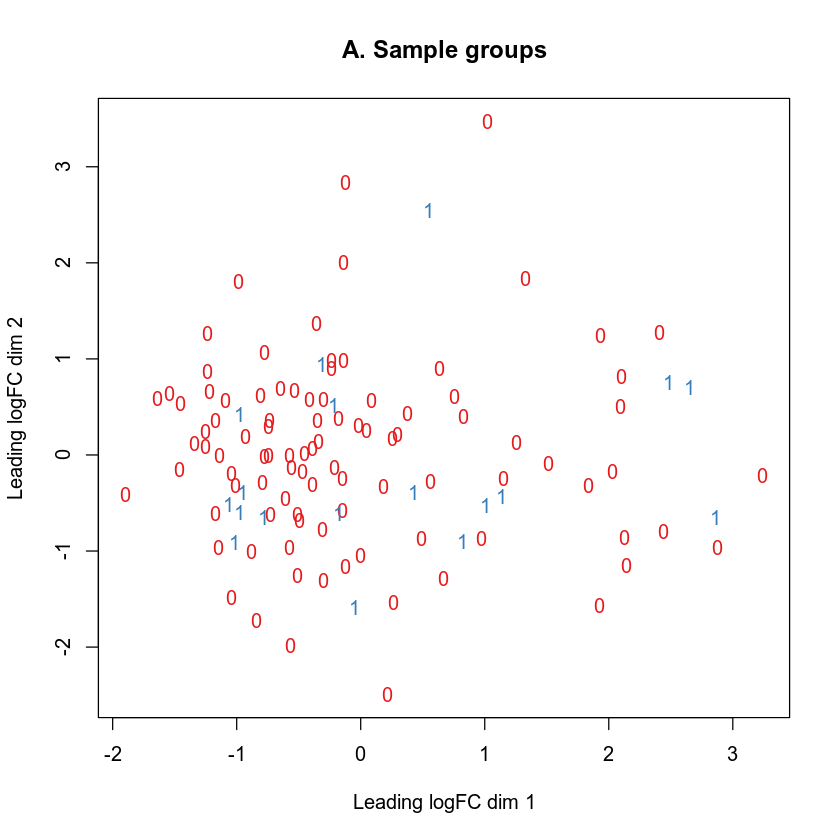

In [165]:
lcpm <- cpm(x, log=TRUE)
par(mfrow=c(1,1))
col.group <- group
levels(col.group) <-  brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)
plotMDS(lcpm, labels=metadata$Status_OS, col=col.group)
title(main="A. Sample groups")

**Differential expression analysis**

creating design matrix and constrasts <br>
To see which genes are expressed at different levels between the populations. 

0 is used to remove intersept from factor.

In [167]:
design <- model.matrix(~0+group)
#colnames(design) <- gsub("group", "", colnames(design))
colnames(design) <- c('Group1','Group2')
head(design)

Group1,Group2
0,1
1,0
1,0
1,0
1,0
1,0


In [22]:
contr.matrix <- makeContrasts(NvsD = Group2 - Group1,
                              levels = design)
contr.matrix

,NvsD
Group1,-1
Group2,1


**Differential expression: voom**

**Removing heteroscedascity from count data**

When operating on a DGEList-object, voom converts raw counts to log-CPM values by automatically extracting library sizes and normalisation factors from x itself.

,group,lib.size,norm.factors
A03U,1,60928921,0.8191310
A04D,0,65351774,1.0520796
A04J,0,67078261,1.1293873
A04U,0,34346938,0.8880886
A07C,0,71080467,1.0294202
A07O,0,59866985,0.9445335
A08R,0,64029293,1.0431384
A09X,1,45731986,0.9701516
A0AL,0,46670943,0.9441488
A0AR,0,54635690,0.9799590


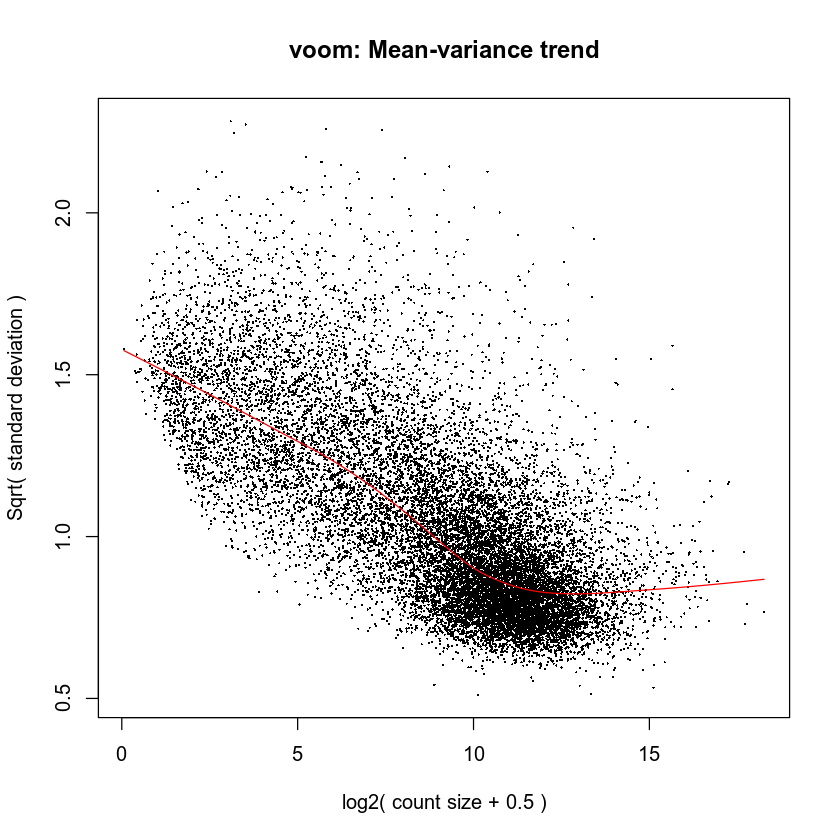

In [41]:
v <- voom(x, design, plot=TRUE)
v

In [33]:
vfit <- lmFit(v, design)                           #lmFit: computes coefficients, residual variances and standard errors.
cfit <- contrasts.fit(vfit, contrasts=contr.matrix)#contrasts.fit: converts the coefficients and standard errors to reflect 
                                                   #the contrasts rather than the original design matrix, but does not 
                                                   #compute t-statistics or p-values.
cfit <- eBayes(cfit)                               #eBayes: computes t-statistics and p-values from the coefficients and standard errors.


In [34]:
summary(decideTests(cfit))

        NvsD
Down       0
NotSig 17126
Up         0

,logFC,AveExpr,t,P.Value,adj.P.Val,B
TTLL11.158135,0.7427838,1.358043,4.620861,9.904330e-06,0.1696216,-1.0137948
PTCD2.79810,0.5414000,2.212850,4.268948,4.013458e-05,0.3436724,-1.0676078
TOR1A.1861,0.3951125,5.501462,3.896829,1.628856e-04,0.6188268,-0.3608551
RGS3.5998,0.5737750,5.568151,3.876091,1.756713e-04,0.6188268,-0.3857264
ASB6.140459,0.4322769,5.275378,3.867405,1.813057e-04,0.6188268,-0.4595558
PTPRN2.5799,1.2545043,1.374756,3.779181,2.491695e-04,0.6188268,-2.0275081
ZSCAN5A.79149,-0.8140531,2.006616,-3.740116,2.863836e-04,0.6188268,-2.3975949
FAM129B.64855,0.6142679,7.787414,3.708009,3.208599e-04,0.6188268,-0.7283269
SDS.10993,1.0186642,2.982045,3.704198,3.252039e-04,0.6188268,-1.4150721
DALRD3.55152,0.5778921,4.396222,3.591001,4.827849e-04,0.7513788,-1.2139213


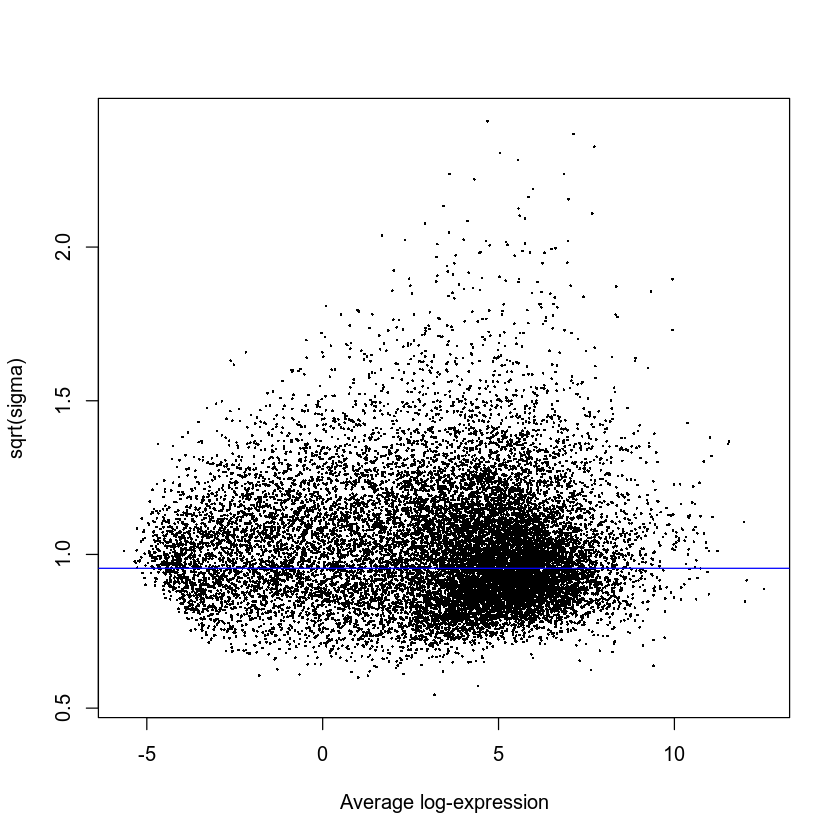

In [160]:
topTable(cfit, coef=1,sort="p",adjust="BH")
plotSA(cfit)

In [29]:
summary(decideTests(cfit))

        NvsD
Down       0
NotSig 17118
Up         0

In [36]:
gvsg2 <- topTreat(cfit, coef=1,n=Inf)
head(gvsg2)
dim(gvsg2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
TTLL11.158135,0.7427838,1.358043,4.620861,9.904330e-06,0.1696216,-1.0137948
PTCD2.79810,0.5414000,2.212850,4.268948,4.013458e-05,0.3436724,-1.0676078
TOR1A.1861,0.3951125,5.501462,3.896829,1.628856e-04,0.6188268,-0.3608551
RGS3.5998,0.5737750,5.568151,3.876091,1.756713e-04,0.6188268,-0.3857264
ASB6.140459,0.4322769,5.275378,3.867405,1.813057e-04,0.6188268,-0.4595558
PTPRN2.5799,1.2545043,1.374756,3.779181,2.491695e-04,0.6188268,-2.0275081


[1] 17126     6

**Useful graphical representations of differential expression results**

**Volcano plot**

In [33]:
plotMD(cfit, column=1, status=dt[,1], 
main=colnames(cfit)[1], xlim=c(-8,13))

ERROR: Error in dt[, 1]: object of type 'closure' is not subsettable


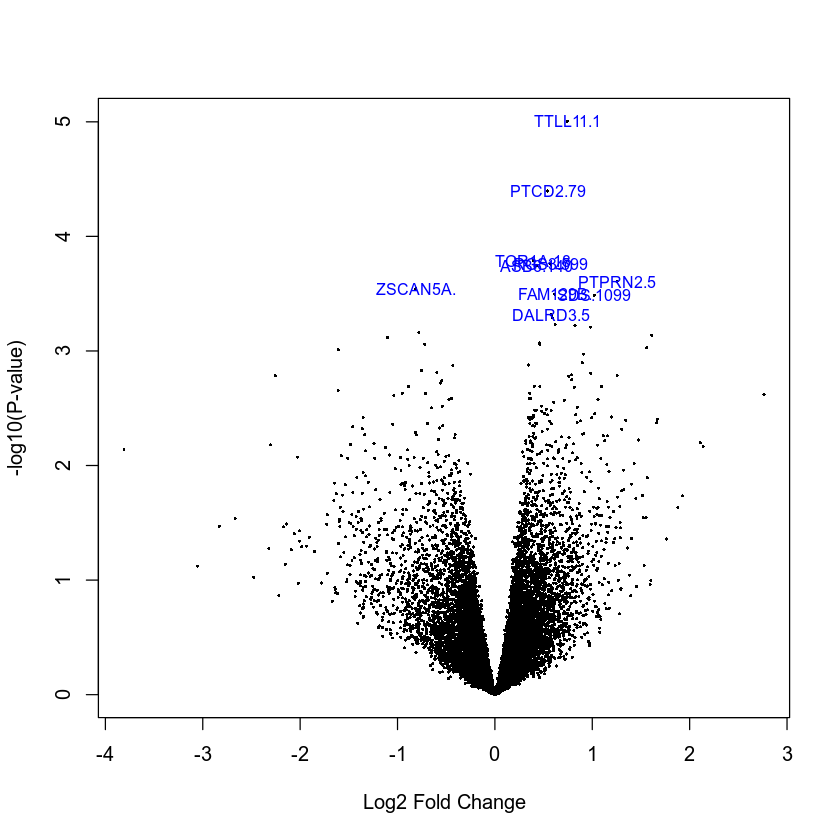

In [40]:
volcanoplot(cfit, coef = 1, style = "p-value", highlight = 10, names = rownames(cfit), hl.col="blue",
            xlab = "Log2 Fold Change", ylab = NULL, pch=16, cex=0.35)

**heatmap** for top 10 gene.

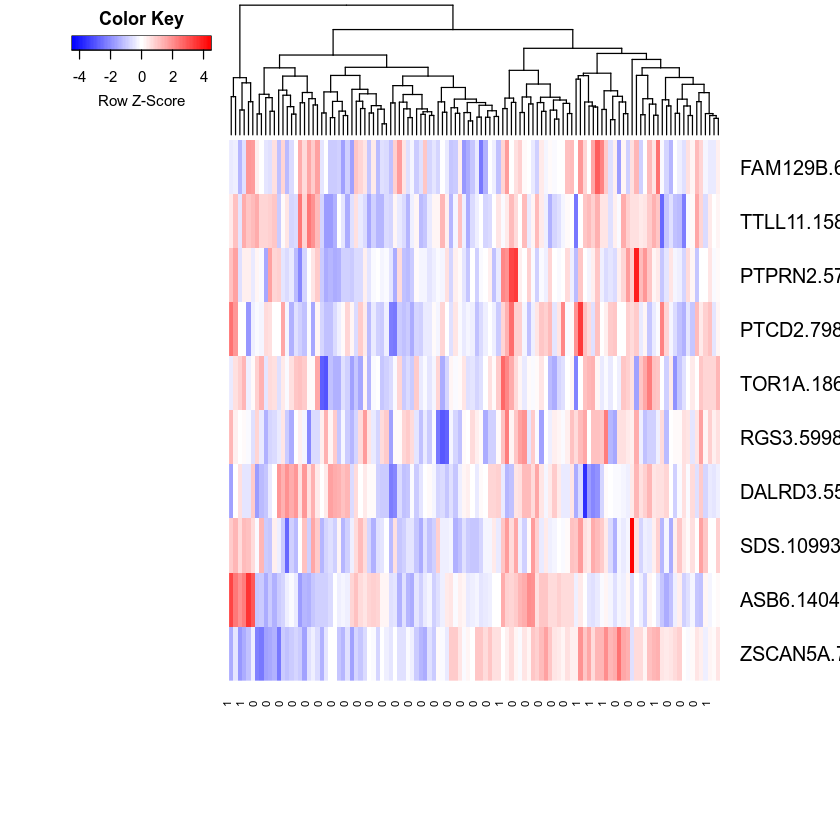

In [72]:
topgenes <- rownames(gvsg2)
topgenes <- topgenes[1:10]
i <- which(rownames(v) %in% topgenes)
mycol <- colorpanel(100,"blue","white","red")

heatmap.2(lcpm[i,], scale="row",
   labRow=rownames(gvsg2), labCol=group,
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")